In [1]:
import pandas as pd

df = pd.read_csv("Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df['Age'] = df['Age'].fillna(df['Age'].median())
print("Missing values after filling Age:")
print(df.isnull().sum())

Missing values after filling Age:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
print("Columns after dropping unnecessary features:")
df.drop(['Name','SibSp','Parch','Ticket','Cabin','Embarked', 'PassengerId'], axis= 1, inplace= True)
df.head()

Columns after dropping unnecessary features:


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df.Sex = encoder.fit_transform(df.Sex)
df.head()  # 1 = Male
           # 0 = Female

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

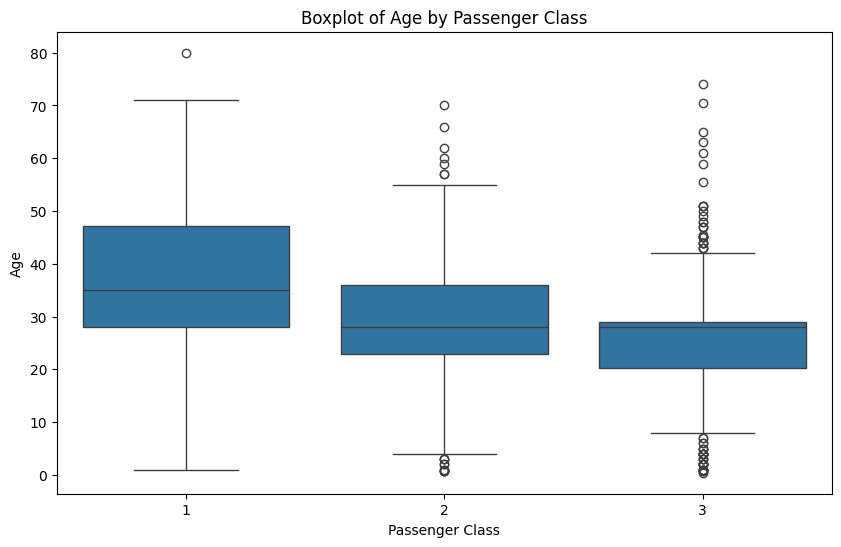

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Boxplot of Age by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

In [8]:
x = df.drop(['Survived'], axis= 1)
y = df.Survived

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

In [11]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.80


In [13]:
predictions = model.predict(X_test)
print("Predictions on the test set:")
print(predictions)

Predictions on the test set:
[0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1]


In [14]:
sample_input = [[2, 0, 39, 70000]]
print(model.predict(sample_input))

[1]


c:\Users\arnab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [15]:
model.predict_proba(X_test[: 10])

array([[0.99      , 0.01      ],
       [0.97      , 0.03      ],
       [0.39833333, 0.60166667],
       [0.01      , 0.99      ],
       [0.6       , 0.4       ],
       [0.15      , 0.85      ],
       [0.27206616, 0.72793384],
       [0.885     , 0.115     ],
       [0.38366667, 0.61633333],
       [0.04      , 0.96      ]])

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[89 16]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



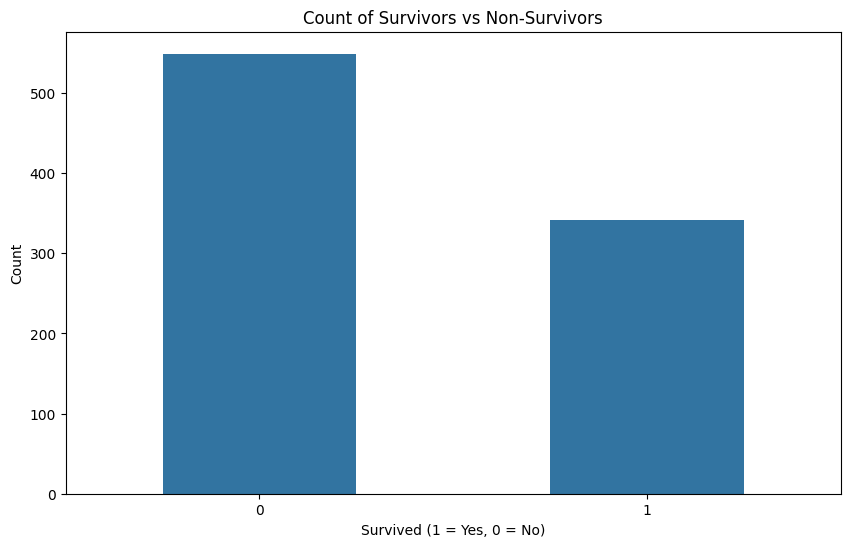

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df, width=0.5)
plt.title('Count of Survivors vs Non-Survivors')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

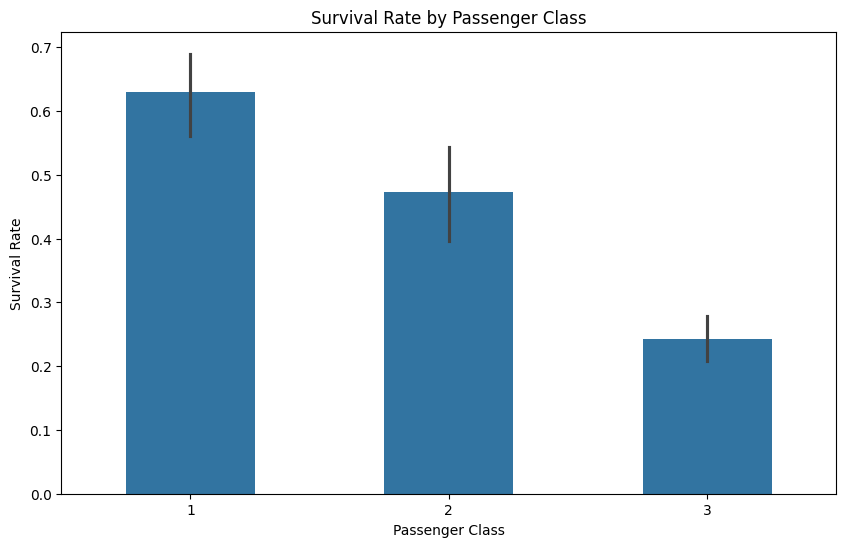

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df, width=0.5)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [19]:
x = df[df['Survived'] == True]['Pclass'].value_counts()
print("Total Number Of Passengers Survived In Each Class:\n", x)

Total Number Of Passengers Survived In Each Class:
 Pclass
1    136
3    119
2     87
Name: count, dtype: int64


In [20]:
y = df[df['Survived'] == 1].groupby('Sex').size()
print("Total Number Of Survivor On The Basis Of Gender:\n", y)

Total Number Of Survivor On The Basis Of Gender:
 Sex
0    233
1    109
dtype: int64


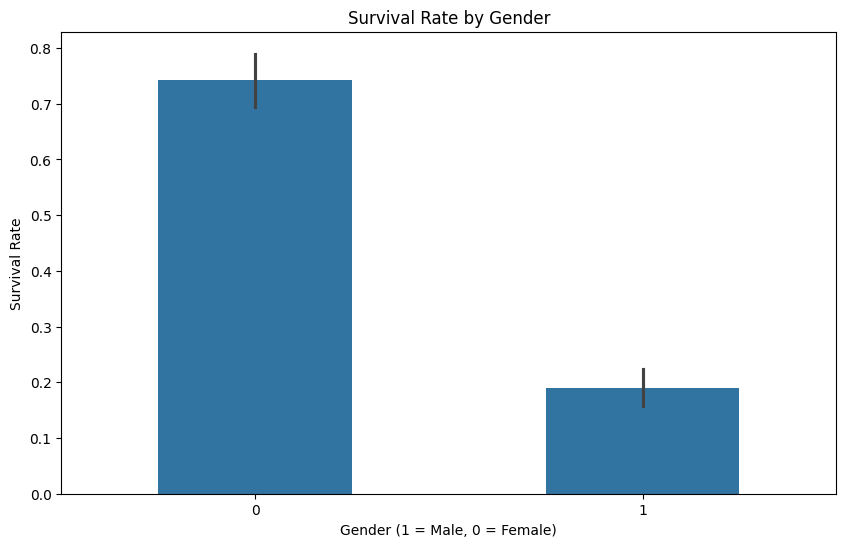

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df, width=0.5)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (1 = Male, 0 = Female)')
plt.ylabel('Survival Rate')
plt.show()